In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

sns.set(style="white")

In [2]:
# Useful function

def get_highest_values(arr, n):
    return np.array(arr).argsort()[-n:][::-1]

def get_lowest_values(arr, n):
    return np.array(arr).argsort()[::-1][-n:][::-1]

In [4]:
data_file = "data/temp.train"
interval = 16

!python generate/generate_data_model_random.py --output data/temp --interval "0, 16"  --kind svdne --metric sub_blocks_area --scenes "A, D, G, H" --nb_zones 16 --random 1 --percent 1.0 --step 10 --each 1 --renderer maxwell --custom temp_min_max_values

## Correlation analysis between SVD features

In [23]:
df = pd.read_csv(data_file, sep=';', header=None)
df = df.drop(df.columns[[0]], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.324794,0.312866,0.322848,0.299767,0.293363,0.297960,0.356265,0.352835,0.342121,0.346001,0.329509,0.395399,0.329650,0.330198,0.373116,0.376142
1,0.405203,0.398725,0.382701,0.371753,0.359809,0.378521,0.433581,0.430025,0.422838,0.412620,0.397897,0.450624,0.399871,0.401700,0.441800,0.445671
2,0.323862,0.311452,0.321688,0.299141,0.292455,0.297024,0.354646,0.351711,0.342375,0.344822,0.329067,0.395195,0.329192,0.329481,0.372637,0.375534
3,0.324096,0.312037,0.322657,0.299463,0.292699,0.297577,0.355800,0.352304,0.342609,0.345576,0.328781,0.395006,0.329373,0.329939,0.372829,0.376044
4,0.331964,0.317376,0.328495,0.306394,0.300271,0.305322,0.361229,0.359550,0.348661,0.350282,0.333434,0.398975,0.334180,0.334781,0.377515,0.381927


In [24]:
# Compute the correlation matrix
corr = df[1:interval].corr()

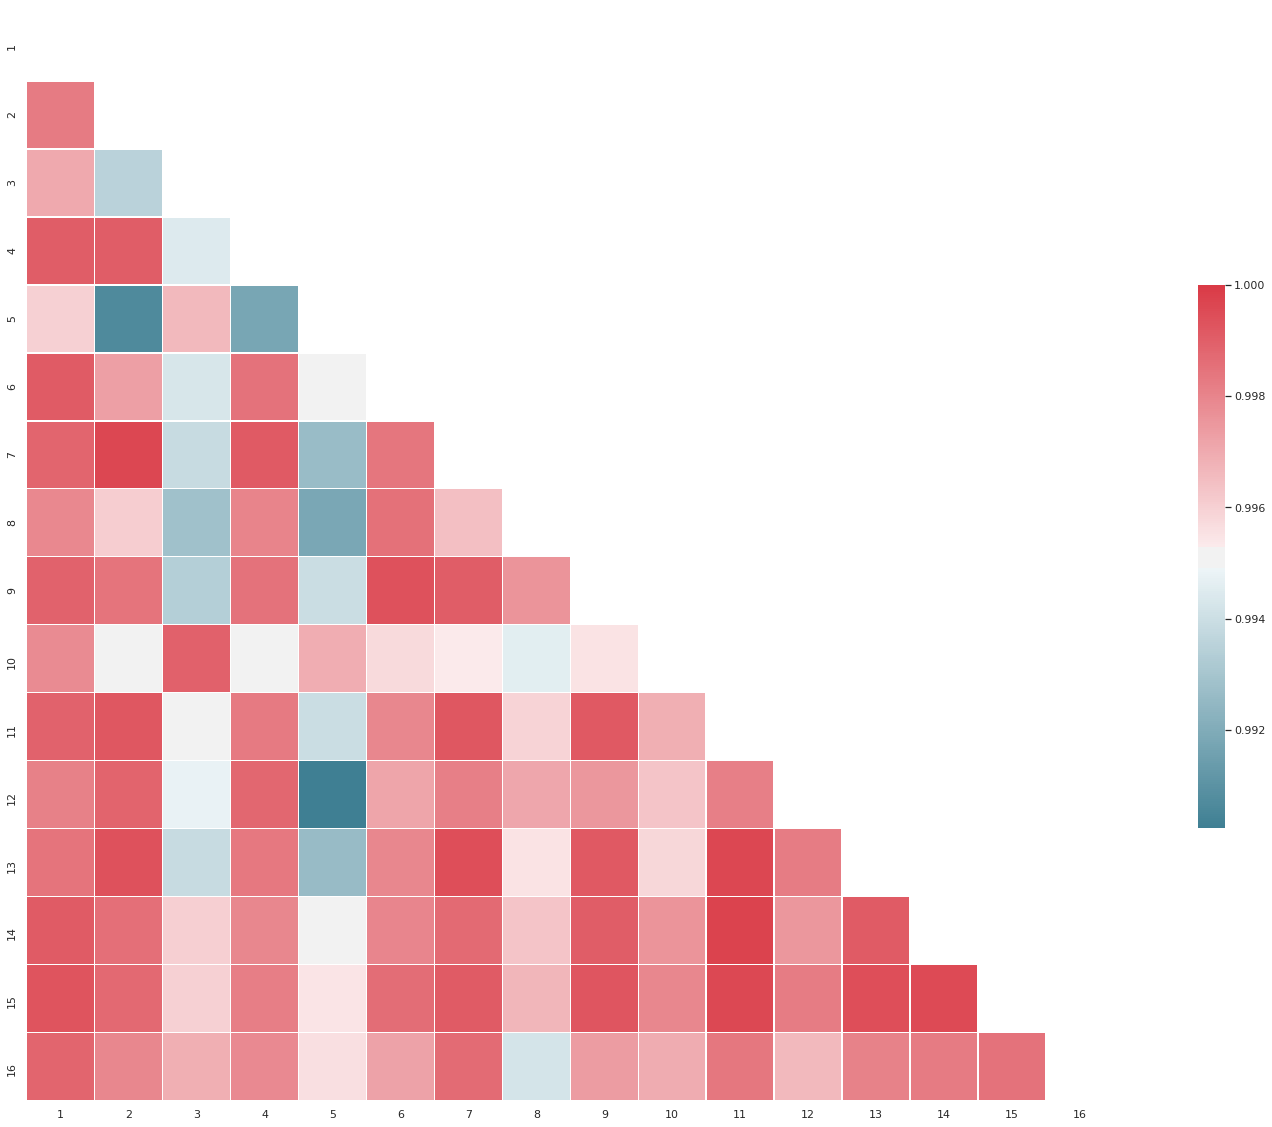

In [25]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
savefig('corr_no_label.png')

In [7]:
features_corr = []

for id_row, row in enumerate(corr):
    correlation_score = 0
    for id_col, val in enumerate(corr[row]):
        if id_col != id_row:
            correlation_score += abs(val)

    features_corr.append(correlation_score)

In [8]:
get_highest_values(features_corr, 20)

array([101, 100, 102,  99, 103, 104,  98, 105,  97,  96,  95, 106,  94,
       107,  93, 108,  92, 109,  91, 110])

In [9]:
get_lowest_values(features_corr, 20)

array([199,   1,   0,   3,   2,   4,   5,   6,   7,   8,   9,  10, 198,
        11,  12, 197, 196, 195,  13, 193])

## Correlation analysis between SVD features and labels

In [26]:
df = pd.read_csv(data_file, sep=';', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0.324794,0.312866,0.322848,0.299767,0.293363,0.297960,0.356265,0.352835,0.342121,0.346001,0.329509,0.395399,0.329650,0.330198,0.373116,0.376142
1,1,0.405203,0.398725,0.382701,0.371753,0.359809,0.378521,0.433581,0.430025,0.422838,0.412620,0.397897,0.450624,0.399871,0.401700,0.441800,0.445671
2,0,0.323862,0.311452,0.321688,0.299141,0.292455,0.297024,0.354646,0.351711,0.342375,0.344822,0.329067,0.395195,0.329192,0.329481,0.372637,0.375534
3,0,0.324096,0.312037,0.322657,0.299463,0.292699,0.297577,0.355800,0.352304,0.342609,0.345576,0.328781,0.395006,0.329373,0.329939,0.372829,0.376044
4,0,0.331964,0.317376,0.328495,0.306394,0.300271,0.305322,0.361229,0.359550,0.348661,0.350282,0.333434,0.398975,0.334180,0.334781,0.377515,0.381927


In [27]:
# Compute the correlation matrix
corr = df.corr()

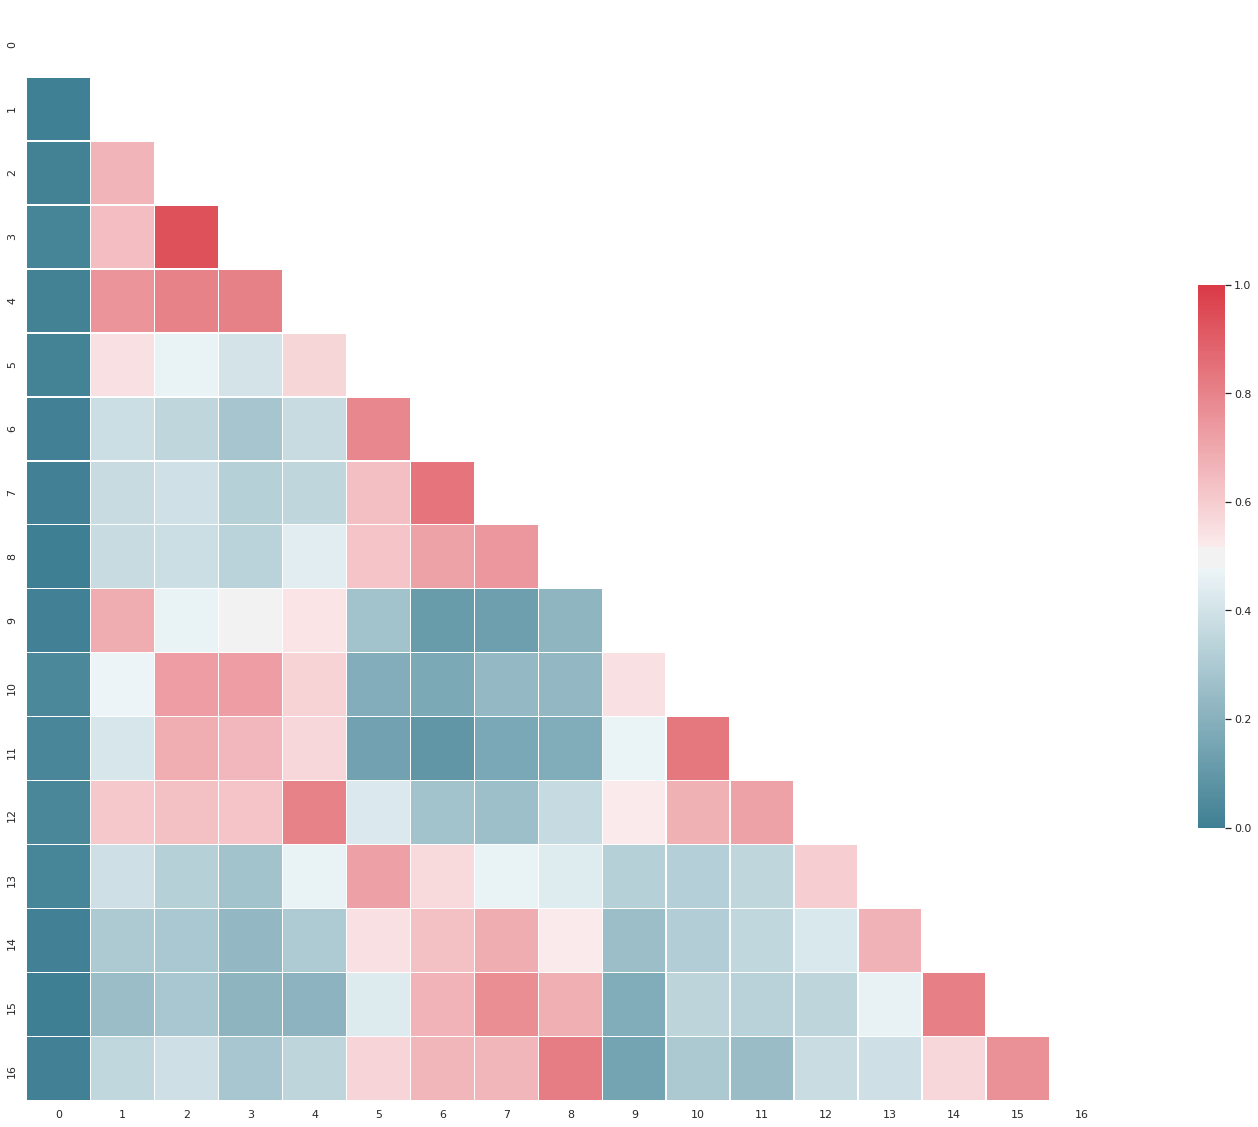

In [28]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
savefig('corr_with_label.png')

In [14]:
features_corr = []

for id_row, row in enumerate(corr):
    for id_col, val in enumerate(corr[row]):
        if id_col == 0 and id_row != 0:
            features_corr.append(abs(val))

In [15]:
get_highest_values(features_corr, 20)

array([192, 191, 194, 193, 187, 190, 189, 188, 186, 195, 185, 184, 183,
       182, 181, 196, 180, 179, 178, 177])

In [16]:
get_lowest_values(features_corr, 20)

array([10, 11,  9, 12,  8,  0,  7, 13, 14, 15,  6,  1, 16, 17, 18, 19,  5,
       20, 21, 22])